In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cardata.csv")
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [ ]:
df['Gender'].replace(['Male', 'Female'],
                        [0, 1], inplace=True)
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,0,35,20000,0
1,681,0,40,43500,0
2,353,0,49,74000,0
3,895,0,40,107500,1
4,661,0,25,79000,0


In [ ]:
X = df[['Gender','Age','AnnualSalary']]
y = df['Purchased']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y, test_size = 1/3 , random_state = 3)

In [ ]:
len(X_train)

666

In [ ]:
len(X_test)

334

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=3)

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
model.score(X_test,y_test)

0.8832335329341318

In [ ]:
model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
print('Accuracy:', metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8832335329341318


In [ ]:
z=[[0,35,20000]]
model.predict(z)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
z=[[0,40,100000]]
model.predict(z)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
from sklearn.tree import plot_tree

In [ ]:
from sklearn import tree
text_representation = tree.export_text (model)
print (text_representation)

|--- feature_1 <= 44.50
|   |--- feature_2 <= 90750.00
|   |   |--- feature_2 <= 69750.00
|   |   |   |--- class: 0
|   |   |--- feature_2 >  69750.00
|   |   |   |--- class: 0
|   |--- feature_2 >  90750.00
|   |   |--- feature_2 <= 117750.00
|   |   |   |--- class: 1
|   |   |--- feature_2 >  117750.00
|   |   |   |--- class: 1
|--- feature_1 >  44.50
|   |--- feature_1 <= 47.50
|   |   |--- feature_2 <= 102000.00
|   |   |   |--- class: 1
|   |   |--- feature_2 >  102000.00
|   |   |   |--- class: 1
|   |--- feature_1 >  47.50
|   |   |--- feature_2 <= 41750.00
|   |   |   |--- class: 1
|   |   |--- feature_2 >  41750.00
|   |   |   |--- class: 1



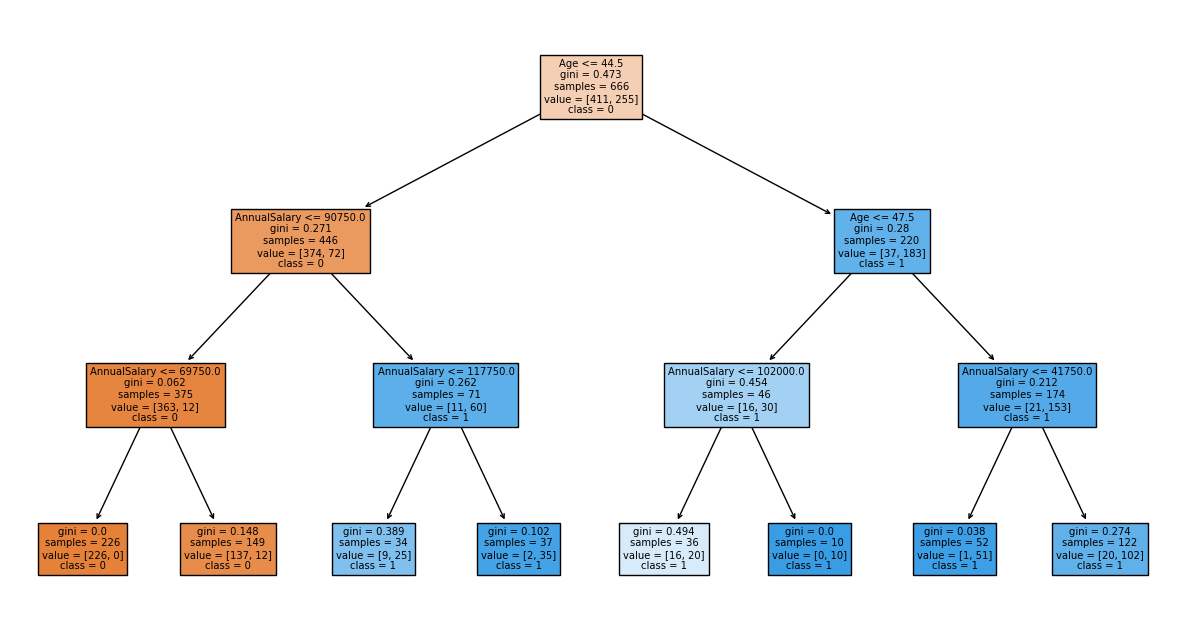

In [ ]:
feature_names = ['Gender','Age','AnnualSalary']
target_names = ['0', '1']
fig= plt.figure(figsize=(15,8))
Plot = tree.plot_tree(model,
feature_names= feature_names,
class_names = target_names,
filled = True)

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
print('Accuracy:', metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8832335329341318


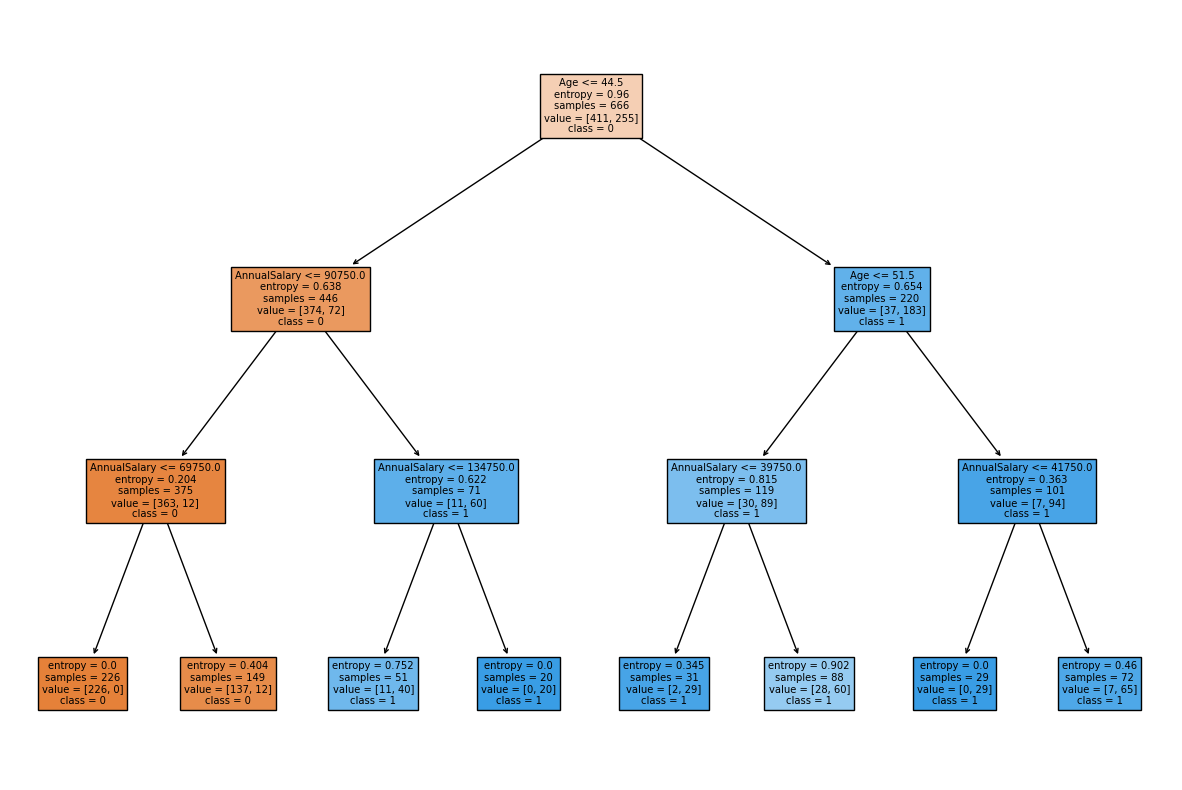

In [ ]:
feature_names = ['Gender','Age','AnnualSalary']
target_names = ['0', '1']
fig= plt.figure(figsize=(15,10))
Plot = tree.plot_tree(model,
feature_names= feature_names,
class_names = target_names,
filled = True)

Accuracy: 0.8832335329341318
Confusion Matrix:
 <function confusion_matrix at 0x7e77618dac20>
[[159  28]
 [ 11 136]]


Text(0.5, 1.0, 'Confusion Matrix')

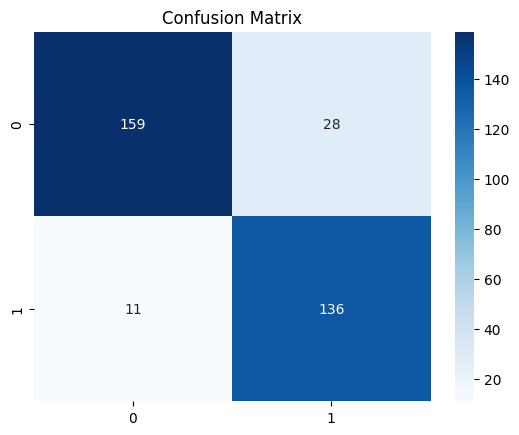

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

accuracy = accuracy_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred,)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix)


print(matrix)
sns.heatmap(matrix, annot=True,fmt='d',cmap="Blues").set_title("Confusion Matrix")